In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import re
from datetime import datetime

pattern = re.compile(r'^on (\w+) (\d+), (\d+)')

month_list = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September', 
    'October',
    'November',
    'December',
]

def parse_month(str):
    m = pattern.match(str)
    if m is None:
        raise Exception("format error:'%s'" % str)
    month_str = m.group(1)
    day = int(m.group(2))
    year = int(m.group(3))
    mouth = month_list.index(month_str) + 1
    return datetime(year, mouth, day)

# data preprocess
fiveStarReviewsDf = pd.read_csv(
    'FiveStarReviews.csv', 
    header=None,
    names=['time', 'five star'])
fiveStarReviewsDf['time'] = fiveStarReviewsDf.time.apply(parse_month)
fiveStarReviewsDf.set_index('time', inplace=True)

fourStarReviewDf = pd.read_csv(
    'FourStarReviews.csv', 
    header=None,
    names=['time', 'four star'])
fourStarReviewDf['time'] = fourStarReviewDf.time.apply(parse_month)
fourStarReviewDf.set_index('time', inplace=True)

oneStarReviewsDf = pd.read_csv(
    'OneStarReviews.csv', 
    header=None,
    names=['time', 'one star'])
oneStarReviewsDf['time'] = oneStarReviewsDf.time.apply(parse_month)
oneStarReviewsDf.set_index('time', inplace=True)

threeStarReviewsDf = pd.read_csv(
    'ThreeStarReviews.csv', 
    header=None,
    names=['time', 'three star'])
threeStarReviewsDf['time'] = threeStarReviewsDf.time.apply(parse_month)
threeStarReviewsDf.set_index('time', inplace=True)

twoStarReviewsDf = pd.read_csv(
    'TwoStarReviews.csv', 
    header=None,
    names=['time', 'two star'])
twoStarReviewsDf['time'] = twoStarReviewsDf.time.apply(parse_month)
twoStarReviewsDf.set_index('time', inplace=True)

# plot by day count
groupby = fiveStarReviewsDf.groupby(fiveStarReviewsDf.index)
counts_5 = groupby.count()
groupby = fourStarReviewDf.groupby(fourStarReviewDf.index)
counts_4 = groupby.count()
groupby = threeStarReviewsDf.groupby(threeStarReviewsDf.index)
counts_3 = groupby.count()
groupby = twoStarReviewsDf.groupby(twoStarReviewsDf.index)
counts_2 = groupby.count()
groupby = oneStarReviewsDf.groupby(oneStarReviewsDf.index)
counts_1 = groupby.count()

count_month_5 = fiveStarReviewsDf.resample('M').count()
count_month_4 = fourStarReviewDf.resample('M').count()
count_month_3 = threeStarReviewsDf.resample('M').count()
count_month_2 = twoStarReviewsDf.resample('M').count()
count_month_1 = oneStarReviewsDf.resample('M').count()

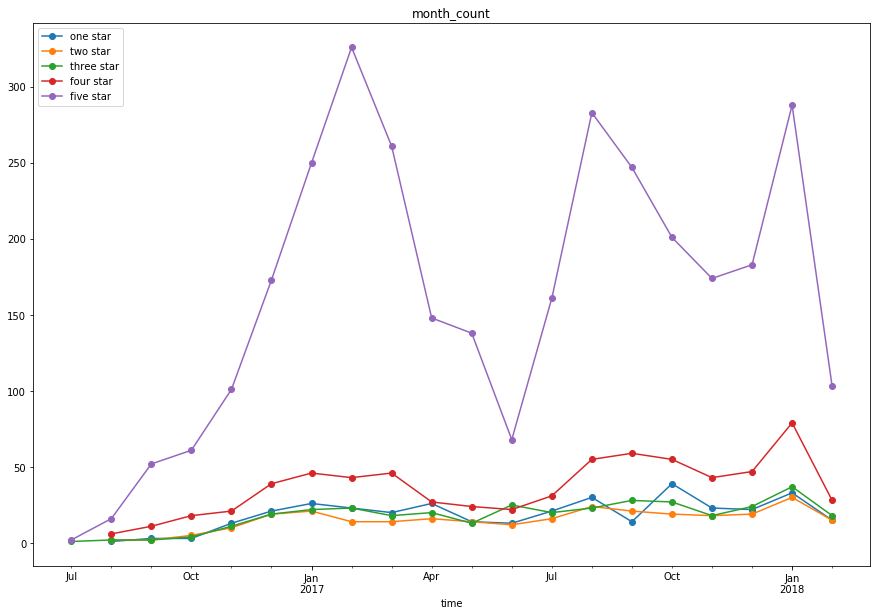

In [3]:
# The first figure shows contiguous daily reviews
# The second is based on month

pd.concat((count_month_1, count_month_2, count_month_3, count_month_4, count_month_5), axis=1).plot(
    figsize=(15, 10), title='month_count', style='o-')

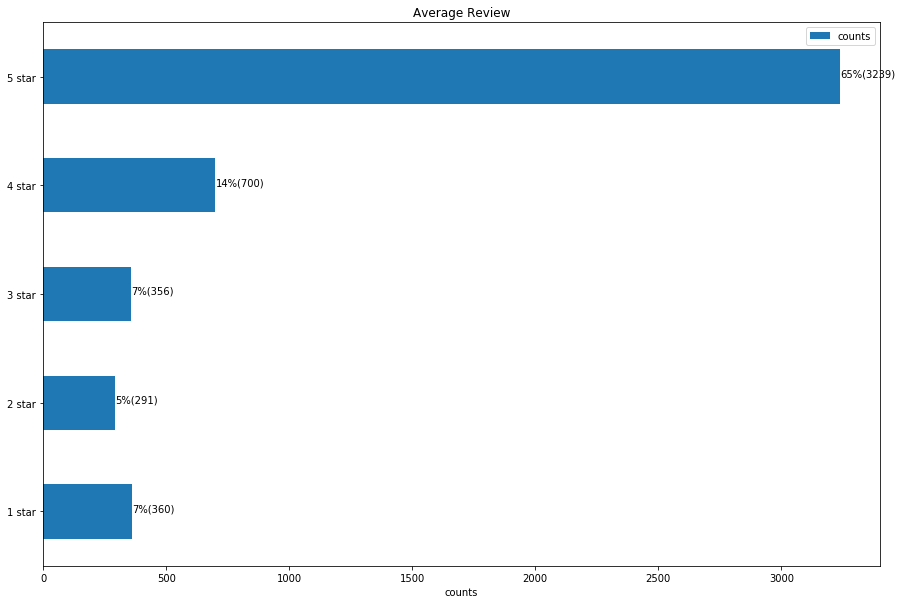

In [11]:
#It shows the number of different reviews and their percentage
counts = list(map(lambda x:x.shape[0], (oneStarReviewsDf, twoStarReviewsDf, threeStarReviewsDf, fourStarReviewDf, fiveStarReviewsDf)))
df_counts = pd.DataFrame(counts, index=('1 star', '2 star', '3 star', '4 star', '5 star'),columns = ['counts'])
ax = df_counts.plot.barh(figsize=(15, 10))
ax.set_title('Average Review')
ax.set_xlabel('counts')

rects = ax.patches
labels = []
for (review, freq) in df_counts.iterrows():
    labels.append( ('%d%%' % int(freq/df_counts.counts.sum() * 100)) + ('(%d)' % int(freq)) )

for rect,label in zip(rects,labels):
    width = rect.get_width()
    plt.text(width + 1, rect.get_y() + rect.get_height()/2, label)

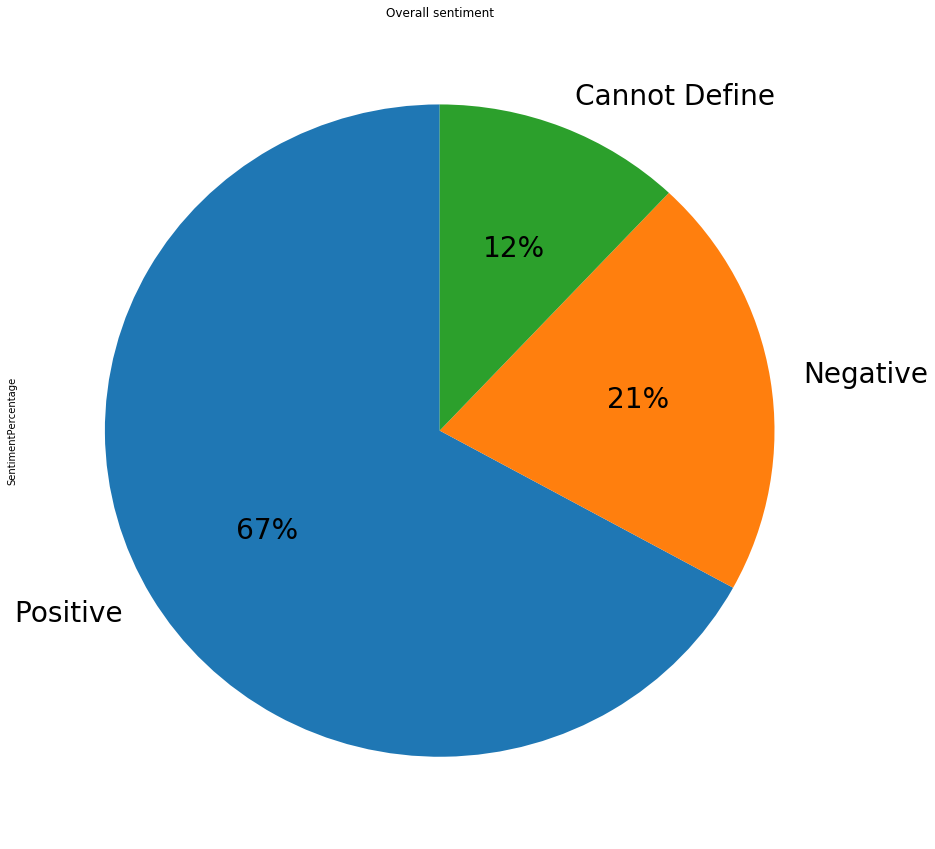

In [33]:
#This figure shows percentage of positive and negative reviews, including not defined.
ser = pd.read_csv(
    'Data/OverallSentiment.csv', 
    header=None, 
    index_col=0, 
    squeeze=True, 
    names=['SentimentPercentage']
)
ser.index.name = 'sentiment'
ser = ser.apply(lambda x:int(x.split('%')[0]))
ser.plot.pie(
    figsize=(15, 15), 
    labels=['Positive', 'Negative', 'Cannot Define'],
    labeldistance=1.1, 
    autopct='%2.0f%%', 
    shadow=False,                          
    startangle=90, 
    pctdistance=0.6,
    fontsize=28,
    title='Overall sentiment'
)

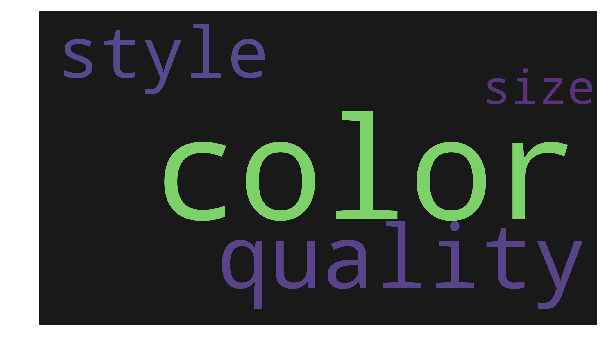

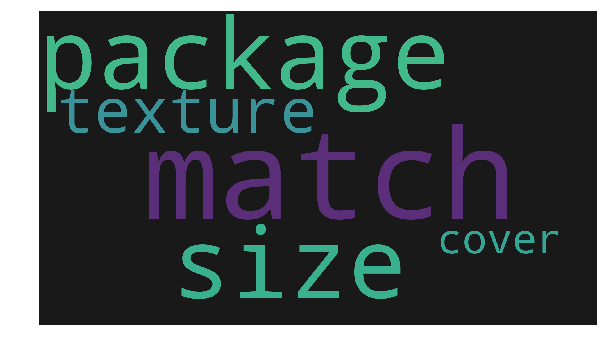

In [34]:
# Please install wordcloud and xlrd first
# This shows the top 5 sentiment keywords of both positive and negative

from wordcloud import WordCloud

title = ['Positive', 'Negative']
for i in range(2):
    df = pd.read_excel('Data/SentimentKeyword.xlsx', sheet_name=i)
    wcld = WordCloud(
        width=1920,
        height=1080,
        max_words=5
    ).generate(' '.join( map(lambda x: x[:-1], ((df.Keyword + ' ') * (df.Count//10)) ) ))
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(wcld, alpha=0.9)